# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [99]:
data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns = data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [100]:
scaler = StandardScaler()
pca = make_pipeline(scaler, PCA(2))

In [101]:
pca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [102]:
pca = pca.named_steps['pca']

In [103]:
X2 = pca.transform(X)

In [104]:
wine = pd.DataFrame(X2, columns = ['PCA1', 'PCA2'])

In [105]:
wine.head()

,PCA1,PCA2
0,325.637020,-436.868698
1,317.812078,-422.143492
2,355.267740,-472.707109
3,442.477439,-585.573346
4,227.486905,-313.004257


In [106]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [107]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

In [108]:
wine['target'] = pd.Series(data['target'], name = 'target')

In [109]:
wine.head()

,PCA1,PCA2,target
0,325.637020,-436.868698,0
1,317.812078,-422.143492,0
2,355.267740,-472.707109,0
3,442.477439,-585.573346,0
4,227.486905,-313.004257,0


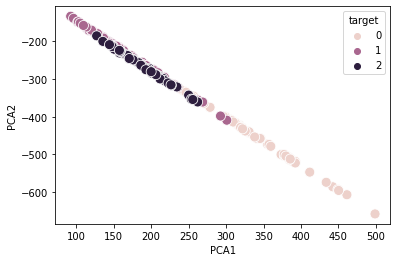

In [110]:
sns.scatterplot(x = 'PCA1',
                y = 'PCA2', 
                data = wine, 
                hue = 'target', 
                s = 100);

/Users/victor/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

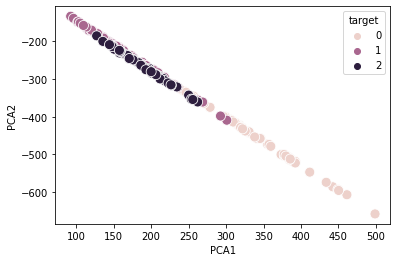

In [111]:
k_means = KMeans(n_clusters = 8, random_state = 0)

k_means.fit(X)

data['cluster'] = k_means.labels_

sns.scatterplot('PCA1', 'PCA2', 
                data = wine, 
                hue = 'target', 
                s = 100);

In [112]:
silhouette_score(X2, labels = k_means.labels_)

0.5509343187675171

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

/Users/victor/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

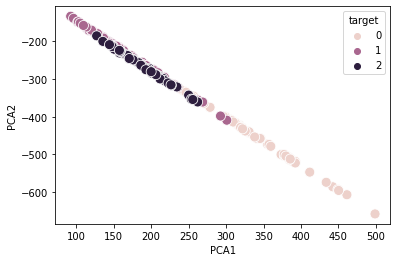

In [115]:
k_means = KMeans(n_clusters = 5, random_state = 0)

k_means.fit(X)

data['cluster'] = k_means.labels_

sns.scatterplot('PCA1', 'PCA2', 
                data = wine, 
                hue = 'target', 
                s = 100);

In [116]:
silhouette_score(X2, labels = k_means.labels_)

0.5637338809313494

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

/Users/victor/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


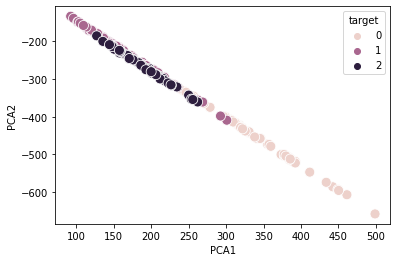

In [119]:
k_means = KMeans(n_clusters = 3, random_state = 0)

k_means.fit(X)

data['cluster'] = k_means.labels_

sns.scatterplot('PCA1', 'PCA2', 
                data = wine, 
                hue = 'target', 
                s = 100);

In [118]:
silhouette_score(X2, labels = k_means.labels_)

0.5752477869265815

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.